In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import time

from scipy.spatial import KDTree

import skeletor as sk

from skeletor.skeleton import Octree
from skeletor.data import loadTestDataset, plotTestDatasets, TEST_DATASETS_2D, TEST_DATASETS_3D

import tqdm

(868, 2)


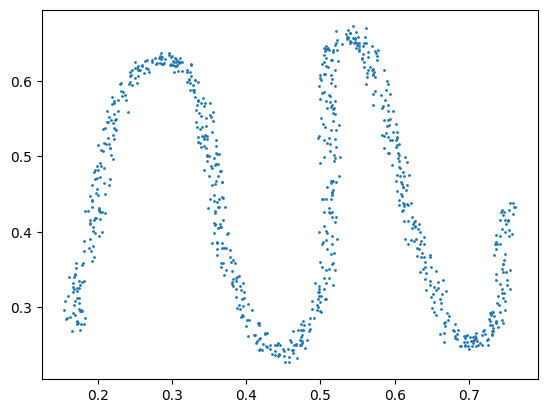

In [2]:
points = loadTestDataset('2d_curve_2', extraNoise=.02)

print(points.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d' if points.shape[-1] == 3 else None)

ax.scatter(*points.T, s=1)
plt.show()

Partioned space into 300 boxes, of which 123 contain points.
Found average nearest neighbor distance: 0.004047996958581986


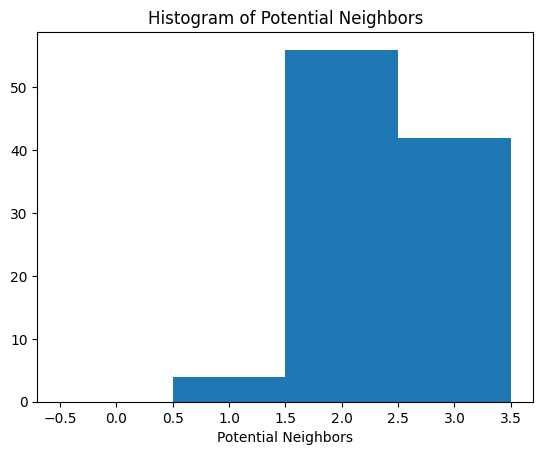

Registered neighbor by alignment of principle moments
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by alignment of principle moments
Registered neighbor by path integral threshold
Registered neighbor by path integral threshold
Registered neighbor by alignment of principle moments
Registered neighbor by alignment of principle moments
Registered neighbor by alignment of principle moments
Registered neighbor by path integral threshold
Registered neighbor by alignment of principle moments
Registered neighbor by path integral threshold
Registered neighbo

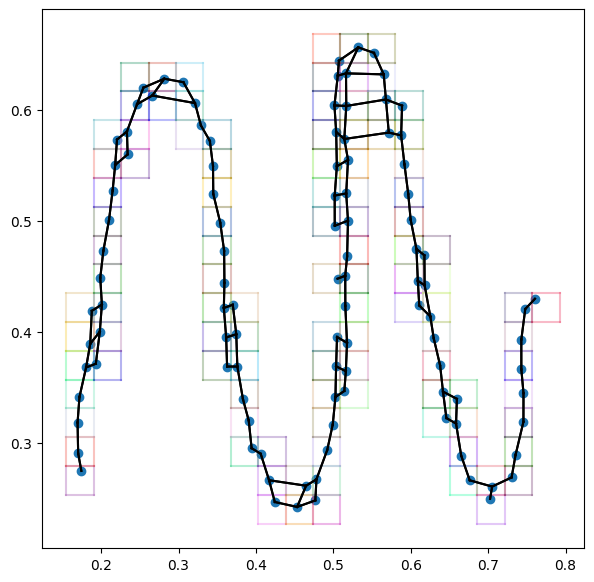

In [3]:
octree = Octree(points, 300, debug=True)
fig = octree.plotSkeleton(lineKwargs={'c':'black'})
fig.set_size_inches((7,7))
plt.show()

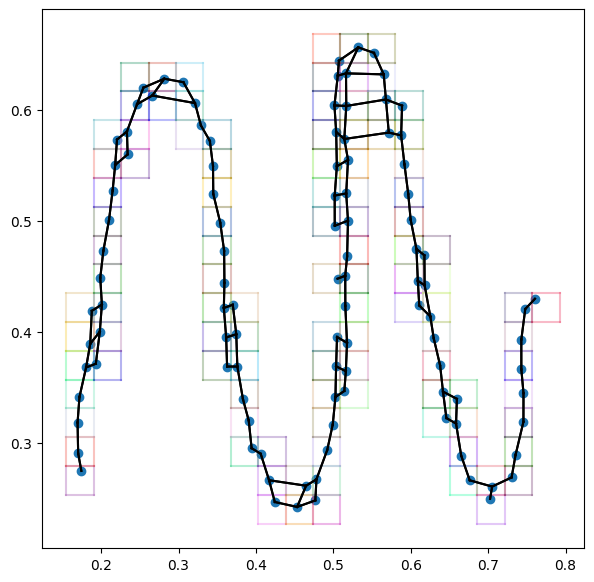

In [4]:
fig = octree.plotSkeleton(lineKwargs={'c':'black'})
fig.set_size_inches((7,7))
#plt.gca().set_view_init(20, 30)
plt.show()

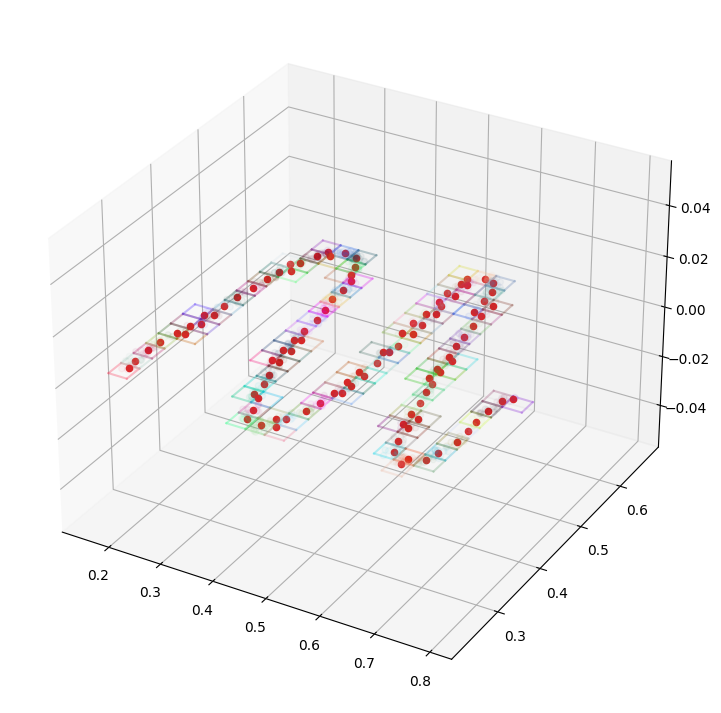

In [5]:
#%matplotlib widget
fig = octree.plot(plotBoxKwargs={'drawFaceCenters':False})
fig.set_size_inches((9,9))
plt.show()

# Test all available datasets

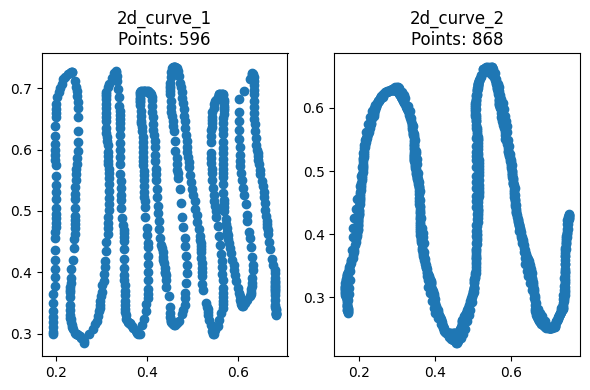

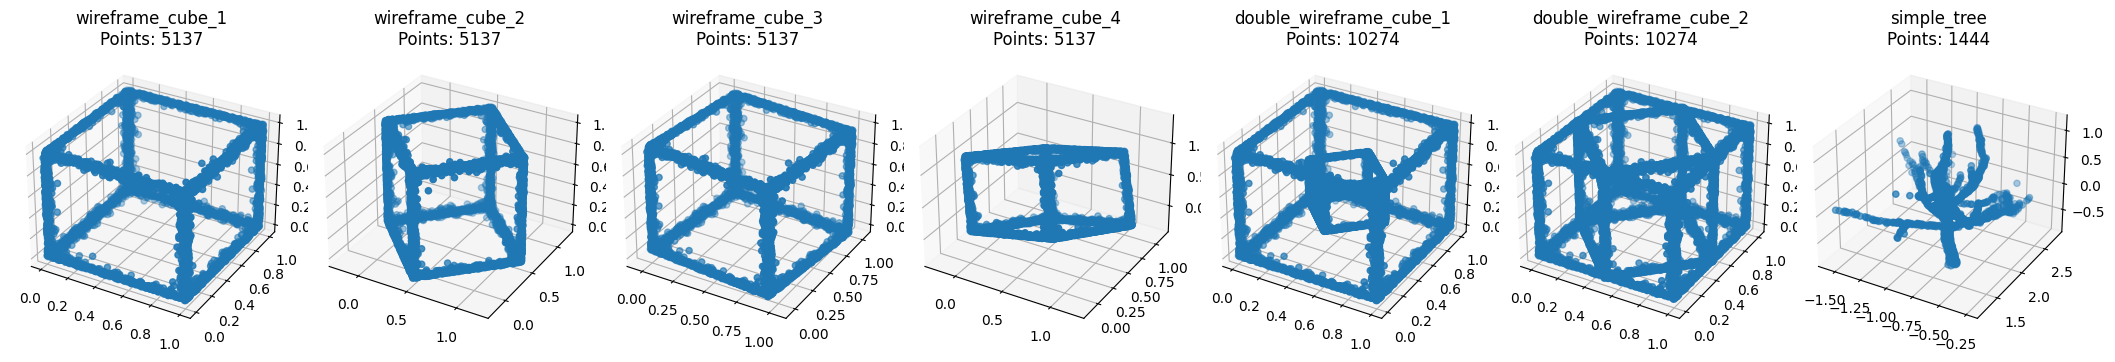

In [2]:
plotTestDatasets()

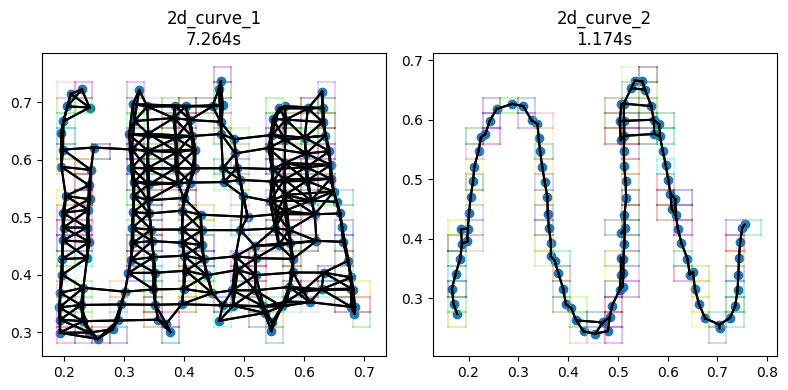

In [ ]:

fig = plt.figure(figsize=(len(TEST_DATASETS_2D)*4,4))
for i, dataset in enumerate(TEST_DATASETS_2D):
    points = loadTestDataset(dataset, extraNoise=.01)
    startTime = time.perf_counter()
    ax = fig.add_subplot(1, len(TEST_DATASETS_2D), i+1)
    
    octree = Octree(points, 300, debug=False)
    octree.plotSkeleton(ax=ax, lineKwargs={'c':'black'})
    ax.set_title(f'{dataset}\n{(time.perf_counter() - startTime):.4}s')
    
fig.tight_layout()    
plt.show()

fig = plt.figure(figsize=(len(TEST_DATASETS_3D)*4,4))
for i, dataset in enumerate(TEST_DATASETS_3D):
    points = loadTestDataset(dataset, extraNoise=.02)
    startTime = time.perf_counter()
    ax = fig.add_subplot(1, len(TEST_DATASETS_3D), i+1, projection='3d')
    
    octree = Octree(points, 300, debug=False)
    octree.plotSkeleton(ax=ax, lineKwargs={'c':'black'})
    ax.set_title(f'{dataset}\n{(time.perf_counter() - startTime):.4}s')
    
fig.tight_layout()    
plt.show()

In [4]:
np.array([1, 2, 3, 4, 5], dtype=np.int32) % 2

array([1, 0, 1, 0, 1], dtype=int32)

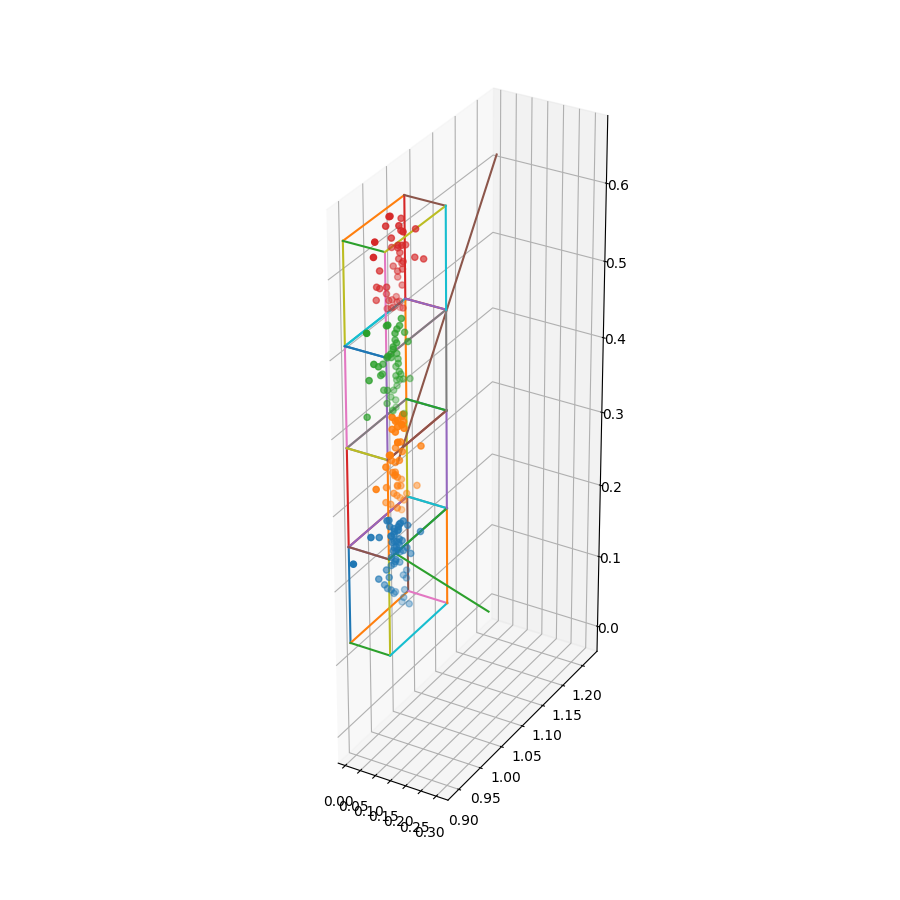

In [4]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#fig = octree.plotSkeleton()
for i in [21, 22, 23, 24]:
  octree.boxes[i].plot(ax=plt.gca(), drawBounds=True, drawPoints=True, drawFaceCenters=False, drawCentroid=False, drawMoments=True)
fig.set_size_inches((9,9))
plt.axis('square')
plt.show()

In [31]:
boxes = [octree.boxes[i] for i in [21, 22, 23]]
allFaces = np.array([fc for b in boxes for fc in b.getBoxFaceCenters()])
kdTree = KDTree(allFaces)
potentialNeighbors = kdTree.query_ball_point(allFaces, .03)
potentialNeighbors = [np.int32(np.floor(np.concatenate(potentialNeighbors[i*6:(i+1)*6])/6)) for i in range(len(boxes))]
potentialNeighbors = [np.unique(n) for n in potentialNeighbors]
print(potentialNeighbors)

[array([0, 1], dtype=int32), array([0, 1, 2], dtype=int32), array([1, 2], dtype=int32)]


In [3]:
test = np.genfromtxt('../touch_data1.csv', delimiter=',')
np.save('2d_curve_2.npy', test)

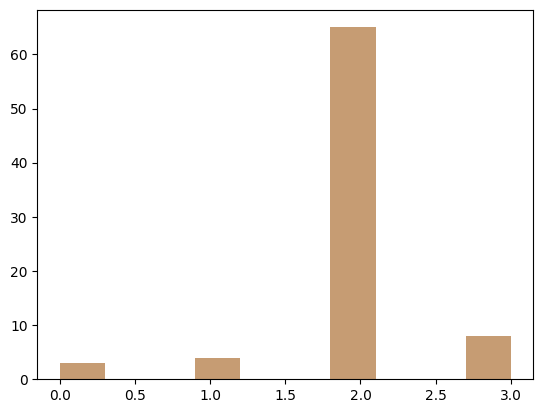

In [10]:
%matplotlib inline
points, adjMat = octree.skeleton()
plt.hist([np.sum(a) for a in adjMat], alpha=.5)
plt.hist([len(b.neighbors) for b in octree.boxes], alpha=.5)
plt.show()

In [5]:
%matplotlib inline
centroids = octree.getCentroids()
adjMat = octree.getAdjMat()

fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.scatter(points[:,0], points[:,1], points[:,2], s=5, alpha=.1)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax2.scatter(centroids[:,0], centroids[:,1], centroids[:,2], s=1)

for i in range(len(adjMat)):
    edgeIndices = np.where(adjMat[i] > 0)[0]
    for j in range(len(edgeIndices)):
        ax2.plot(*list(zip(centroids[i], centroids[edgeIndices[j]])))

fig.tight_layout()
#plt.savefig('cube_discrete_skeleton.png')
plt.show()

AttributeError: 'Octree' object has no attribute 'getCentroids'

In [7]:
dominantDirections = []
adjMat = octree.getAdjMat()
centroids = octree.getCentroids()

for i in tqdm.tqdm(range(len(centroids))):
    hist, thetaBins, phiBins = sk.angularHistogramAroundPoint(centroids, i, adjMat, smoothing=21)
    peakDirections = sk.findDominantHistogramDirections(hist, thetaBins, phiBins, normalize=True)

    dominantDirections.append(peakDirections)

 10%|███▏                            | 11/110 [00:00<00:01, 98.49it/s]../skeletor/peak_finding.py:97: RuntimeWarning: invalid value encountered in true_divide
  peakPrevalences /= dataRange
100%|██████████████████████████████| 110/110 [00:01<00:00, 101.85it/s]


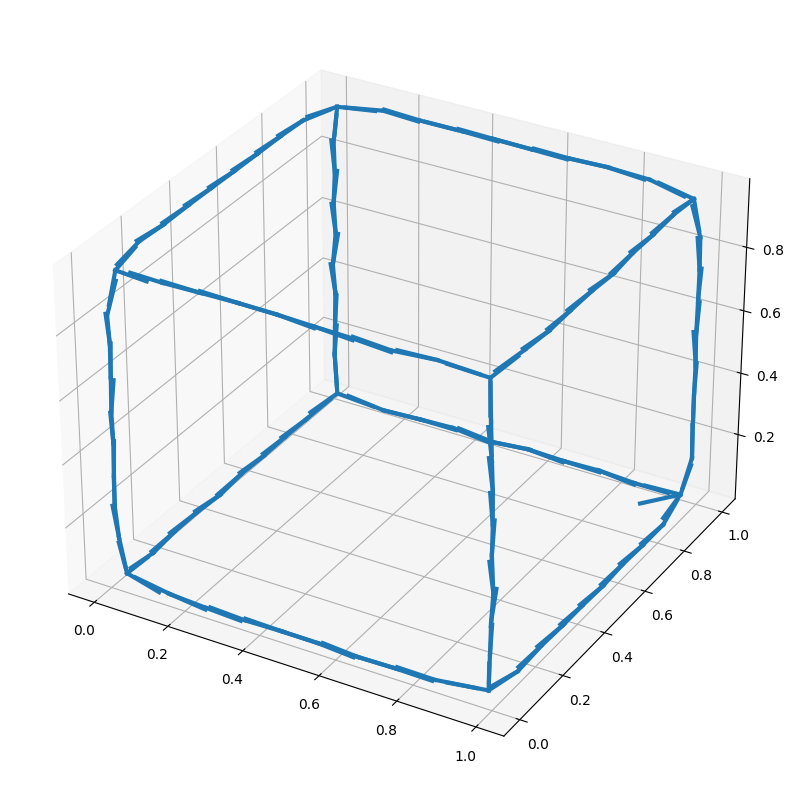

In [8]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(projection='3d')

for i in range(len(centroids)):
    for j in range(len(dominantDirections[i])):
        linePoints = np.array([centroids[i], centroids[i] - .1*dominantDirections[i][j]])
        ax.plot(linePoints[:,0], linePoints[:,1], linePoints[:,2], linewidth=3, c='tab:blue')

plt.show()

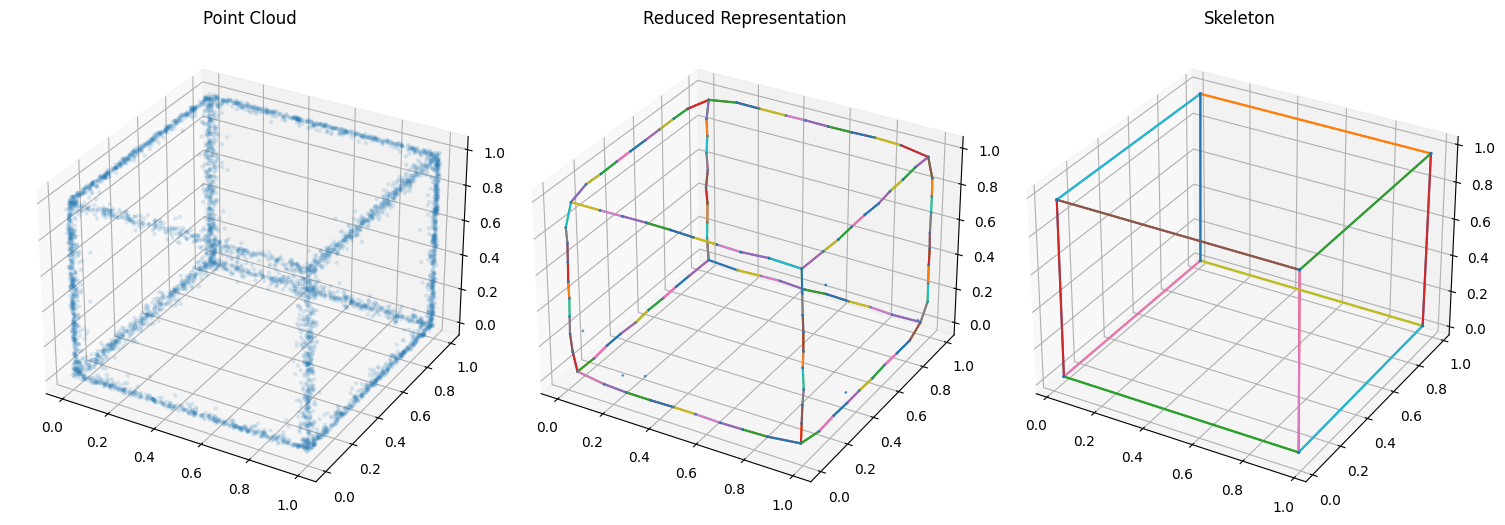

In [10]:
%matplotlib inline

skelPoints, skelAdjMat = octree.skeletonize(threshold=-.7, closed=False, mergeThreshold=1, secondRoundNeighborDetection=True, allowMergePoints=True)

centroids = octree.getCentroids()
adjMat = octree.getAdjMat()

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')

ax1.scatter(points[:,0], points[:,1], points[:,2], s=5, alpha=.1)

ax2 = fig.add_subplot(1, 3, 2, projection='3d')

ax2.scatter(centroids[:,0], centroids[:,1], centroids[:,2], s=1)

for i in range(len(adjMat)):
    edgeIndices = np.where(adjMat[i] > 0)[0]
    for j in range(len(edgeIndices)):
        ax2.plot(*list(zip(centroids[i], centroids[edgeIndices[j]])))

ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax3.scatter(skelPoints[:,0], skelPoints[:,1], skelPoints[:,2], s=2, alpha=1)
for i in range(len(skelAdjMat)):
    edgeIndices = np.where(skelAdjMat[i] > 0)[0]
    for j in range(len(edgeIndices)):
        ax3.plot(*list(zip(skelPoints[i], skelPoints[edgeIndices[j]])))

ax1.set_title('Point Cloud')
ax2.set_title('Reduced Representation')
ax3.set_title('Skeleton')
        
fig.tight_layout()
#plt.savefig('cube_skeletonization.png', bbox_inches='tight')
plt.show()

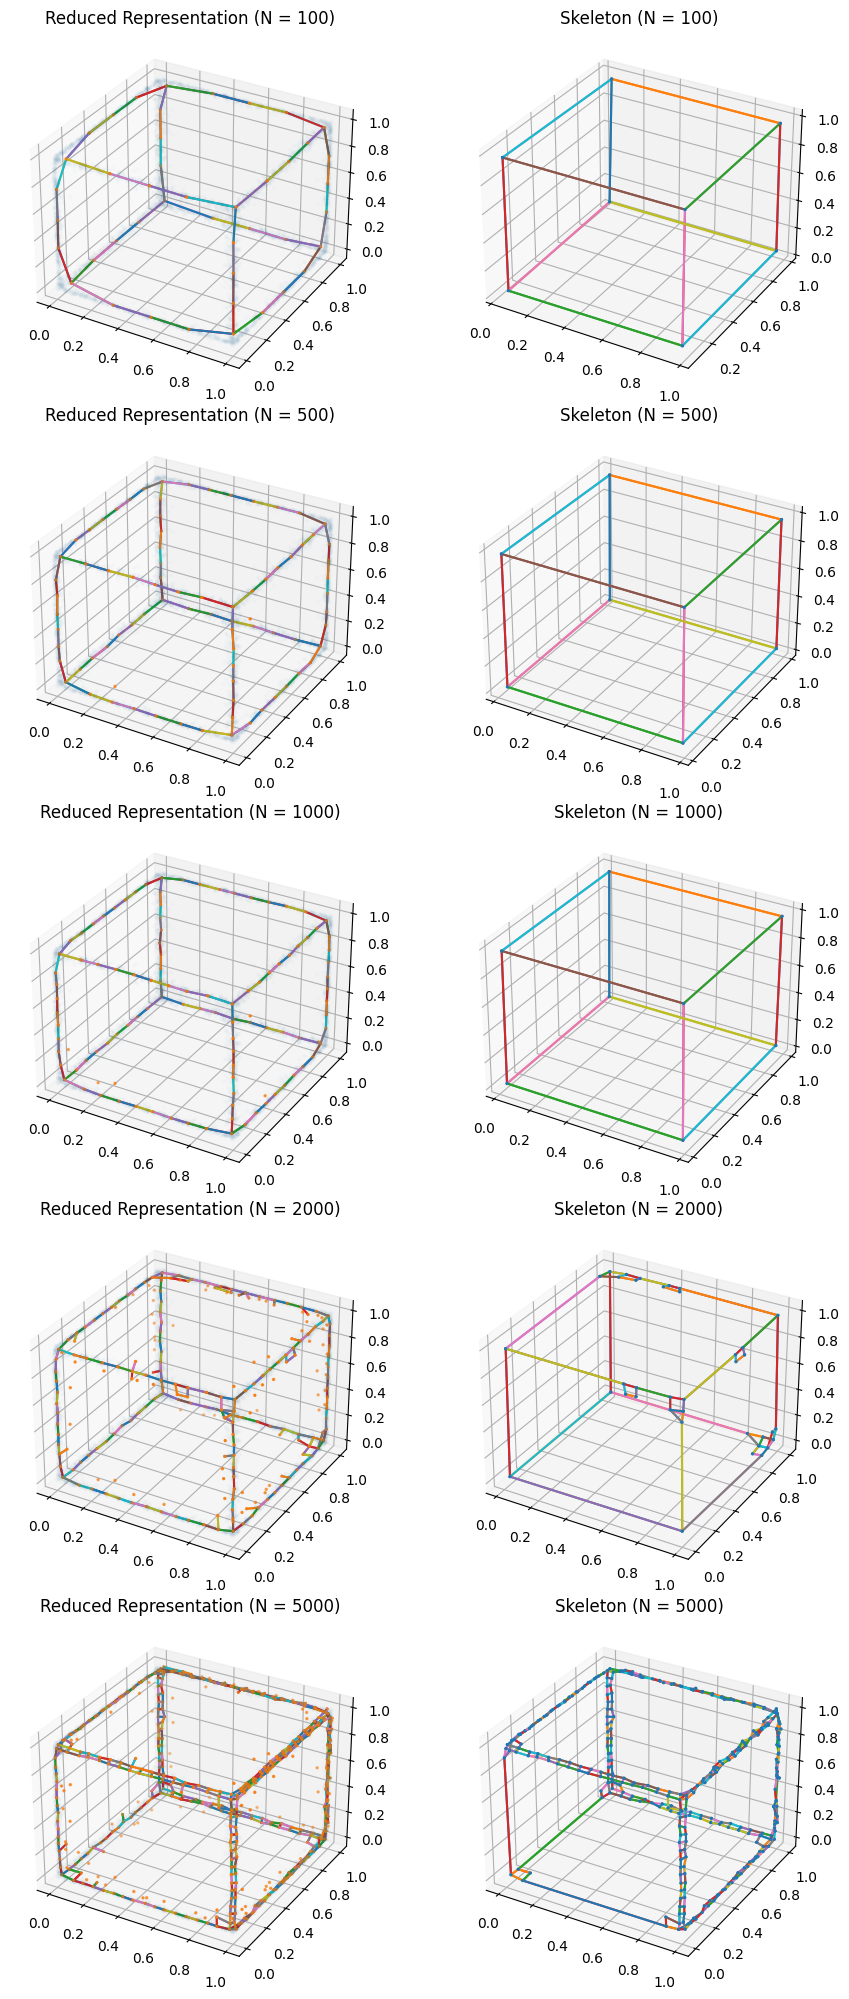

In [14]:
%matplotlib inline

fig = plt.figure(figsize=(10, 20))
nBoxesArr = [100, 500, 1000, 2000, 5000]

for k in tqdm.tqdm(range(len(nBoxesArr))):

    octree = sk.Octree(points, nBoxesArr[k], 1/128, neighborMethod='discrete')
    
    skelPoints, skelAdjMat = octree.skeletonize(threshold=-.7, closed=True, mergeThreshold=1, secondRoundNeighborDetection=True, allowMergePoints=True)

    centroids = octree.getCentroids()
    adjMat = octree.getAdjMat()


    ax1 = fig.add_subplot(len(nBoxesArr), 2, 2*k+1, projection='3d')
    
    ax1.scatter(points[:,0], points[:,1], points[:,2], s=5, alpha=.01)
    ax1.scatter(centroids[:,0], centroids[:,1], centroids[:,2], s=2)

    for i in range(len(adjMat)):
        edgeIndices = np.where(adjMat[i] > 0)[0]
        for j in range(len(edgeIndices)):
            ax1.plot(*list(zip(centroids[i], centroids[edgeIndices[j]])))

    ax2 = fig.add_subplot(len(nBoxesArr), 2, 2*k+2, projection='3d')

    ax2.scatter(skelPoints[:,0], skelPoints[:,1], skelPoints[:,2], s=2, alpha=1)
    for i in range(len(skelAdjMat)):
        edgeIndices = np.where(skelAdjMat[i] > 0)[0]
        for j in range(len(edgeIndices)):
            ax2.plot(*list(zip(skelPoints[i], skelPoints[edgeIndices[j]])))

    ax1.set_title(f'Reduced Representation (N = {nBoxesArr[k]})')
    ax2.set_title(f'Skeleton (N = {nBoxesArr[k]})')

fig.tight_layout()
#plt.savefig('cube_skeletonization.png', bbox_inches='tight')
plt.show()